In [1]:
import pandas as pd
train_dir = "traffic_Data/DATA/" 

labels = pd.read_csv("labels.csv")


In [2]:
import os
lst = []
for i in labels.index:
    lst.append(len(os.listdir(train_dir + str(i))))
labels['count'] = lst
labels['count'].describe()

count     58.000000
mean      71.896552
std       83.818034
min        2.000000
25%       18.000000
50%       38.000000
75%      107.500000
max      446.000000
Name: count, dtype: float64

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense ,BatchNormalization, Dropout


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
image_size = 128

train_datagen = ImageDataGenerator(
        rescale = 1 / 255.,
        shear_range=10,
        zoom_range=0.2,                                       
        fill_mode="nearest",
        validation_split=0.25,
    )

train_generator = train_datagen.flow_from_directory(
    directory = train_dir,          
    target_size = (64, 64), 
    batch_size = 32,
    shuffle=True,
    class_mode = "categorical",   
    subset = "training"     
)
validation_generator = train_datagen.flow_from_directory(
    directory = train_dir,   
    target_size = (64, 64),   
    batch_size = 32, 
    class_mode = "categorical",
    subset = "validation"
)

Found 3144 images belonging to 58 classes.
Found 1026 images belonging to 58 classes.


In [5]:
print(train_generator.class_indices)

{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '43': 38, '44': 39, '45': 40, '46': 41, '47': 42, '48': 43, '49': 44, '5': 45, '50': 46, '51': 47, '52': 48, '53': 49, '54': 50, '55': 51, '56': 52, '57': 53, '6': 54, '7': 55, '8': 56, '9': 57}


In [6]:
num_classes = 58
image_size = 128
batch_size = 32

model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),  

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(56, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\mithu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history = model.fit(
        train_generator,
        steps_per_epoch= 60,
        epochs = 12,
        validation_data=validation_generator,
        validation_steps=5)

Epoch 1/12


c:\Users\mithu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 328ms/step - accuracy: 0.1870 - loss: 3.7242 - val_accuracy: 0.1250 - val_loss: 4.0310
Epoch 2/12
38/60 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.4313 - loss: 2.1399

c:\Users\mithu\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.4478 - loss: 2.0931 - val_accuracy: 0.0188 - val_loss: 4.0956
Epoch 3/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.5379 - loss: 1.7414 - val_accuracy: 0.0312 - val_loss: 3.8320
Epoch 4/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6144 - loss: 1.3968 - val_accuracy: 0.1063 - val_loss: 4.1505
Epoch 5/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.7206 - loss: 1.0353 - val_accuracy: 0.2000 - val_loss: 3.2111
Epoch 6/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7573 - loss: 0.8675 - val_accuracy: 0.4187 - val_loss: 2.5361
Epoch 7/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.7958 - loss: 0.7163 - val_accuracy: 0.3939 - val_loss: 2.2062
Epoch 8/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8168 - loss: 0.6123 - val_accuracy: 0.6313 - val_loss: 1.3343
Epoch 9/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.8495 - loss: 0.5011 - val_accuracy: 0.7750 - val_loss: 0

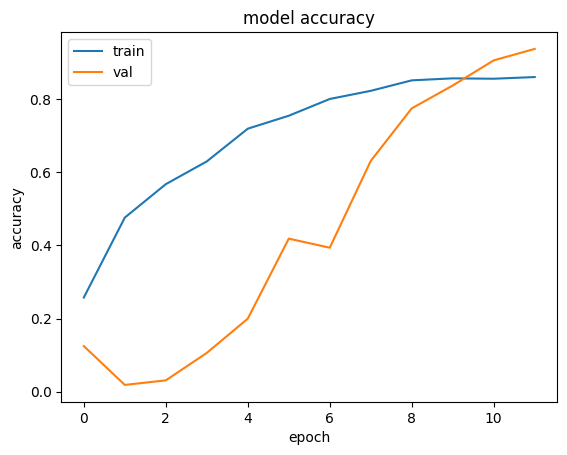

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

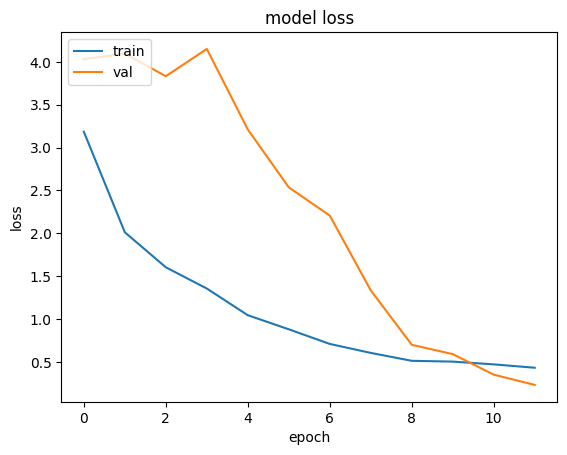

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
history1 = model.fit(
        train_generator,
        steps_per_epoch= 60,
        epochs = 12,
        validation_data=validation_generator,
        validation_steps=5)

Epoch 1/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.8882 - loss: 0.3641 - val_accuracy: 0.9812 - val_loss: 0.1708
Epoch 2/12
38/60 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8957 - loss: 0.3630

c:\Users\mithu\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8969 - loss: 0.3583 - val_accuracy: 0.9563 - val_loss: 0.1625
Epoch 3/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.9073 - loss: 0.2920 - val_accuracy: 0.9438 - val_loss: 0.1794
Epoch 4/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9072 - loss: 0.3217 - val_accuracy: 0.9312 - val_loss: 0.1468
Epoch 5/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.9188 - loss: 0.2698 - val_accuracy: 0.9438 - val_loss: 0.1946
Epoch 6/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9248 - loss: 0.2749 - val_accuracy: 0.9438 - val_loss: 0.2162
Epoch 7/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9247 - loss: 0.2372 - val_accuracy: 0.9697 - val_loss: 0.0888
Epoch 8/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9427 - loss: 0.2016 - val_accuracy: 0.9688 - val_loss: 0.1128
Epoch 9/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9302 - loss: 0.2050 - val_accuracy: 0.9937 - val_loss: 0.

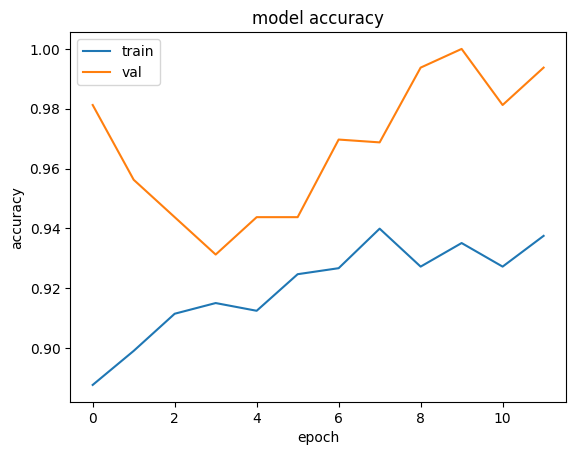

In [11]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

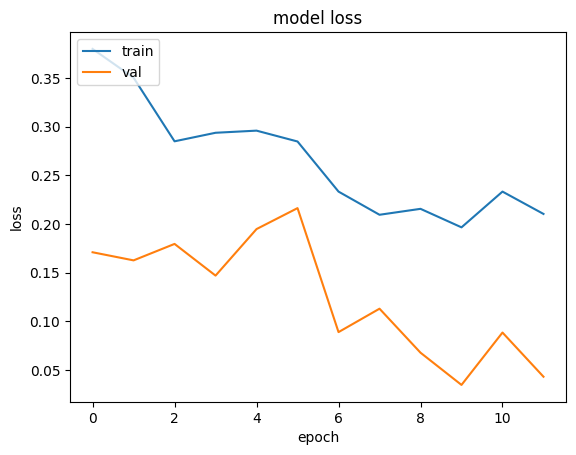

In [12]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 56)             │        57,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 56)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 58)             │         3,306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,351,208 (5.15 MB)

 Trainable params: 450,082 (1.72 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 900,166 (3.43 MB)

In [ ]:
model.save('model.h5',include_optimizer=True)